In [19]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df_demandas = pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas',
                          index_col='date',
                          parse_dates=True)['demandas']

In [21]:
'''
order(
      p = defini a ordem do polinômio autorregressivo,
      d = defini a ordem do operador de diferença simples,
      q = defini a ordem do polinômio média móvel simples
      )
      
seasonal_order(
               P = defini a ordem do polinômio autorregressivo sazonal,
               D = defini a ordem do operador de diferença sazonal,
               Q = defini a ordem do polinômio média móvel sazonal,
               s = é um inteiro que dá a periodicidade (número de períodos na temporada)
               )
'''
#nosso s seria 52

params={
    'freq':'7d',
    #'tren':'ct',
    'order':(8,0,3),
    #'seasonal_order':(0,1,1,52),
    #'order':(5,1,3),
    #'seasonal_order':(1,1,1,52),
}

In [22]:
df_train, df_test = df_demandas.iloc[:166],df_demandas.iloc[166:]

In [23]:
#model=sm.tsa.statespace.SARIMAX(df_train,**params)
model=sm.tsa.arima.ARIMA(df_train,**params)
results=model.fit()

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               demandas   No. Observations:                  166
Model:                 ARIMA(8, 0, 3)   Log Likelihood                -245.142
Date:                Mon, 12 Jun 2023   AIC                            516.285
Time:                        19:30:28   BIC                            556.741
Sample:                    01-01-2015   HQIC                           532.706
                         - 03-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.1241      0.060   1645.019      0.000      99.006      99.242
ar.L1          0.1943      0.094      2.076      0.038       0.011       0.378
ar.L2          0.2052      0.100      2.060      0.039       0.010       0.401
ar.L3          1.0302      0.086     11.975      0.000       0.862       1.199
ar.L4          0.0394      0.111      0.355      0.723      -0.179       0.257
ar.L5         -0.0526      0.133     -0.397      0.692      -0.312       0.207
ar.L6         -0.0948      0.082     -1.152      0.249      -0.256       0.066
ar.L7         -0.1813      0.087     -2.092      0.036      -0.351      -0.011
ar.L8         -0.2754      0.092     -2.984      0.003      -0.456      -0.095
ma.L1         -0.0148      0.270     -0.055      0.956      -0.544       0.514
ma.L2          0.0475      0.301      0.158      0.875      -0.543       0.638
ma.L3         -0.9789      0.559     -1.753      0.080      -2.074       0.116
sigma2         1.0128      0.553      1.831      0.067      -0.071       2.097
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.94   Prob(JB):                         0.51
Heteroskedasticity (H):               0.77   Skew:                             0.22
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
previsao_test = results.predict(start=len(df_train),end=len(df_train)+len(df_test)-1,dynamic=True)

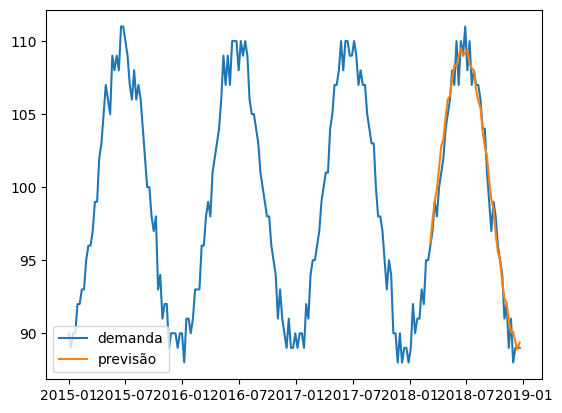

In [26]:
plt.plot(df_demandas,label='demanda')
plt.plot(previsao_test,label='previsão')
plt.legend()

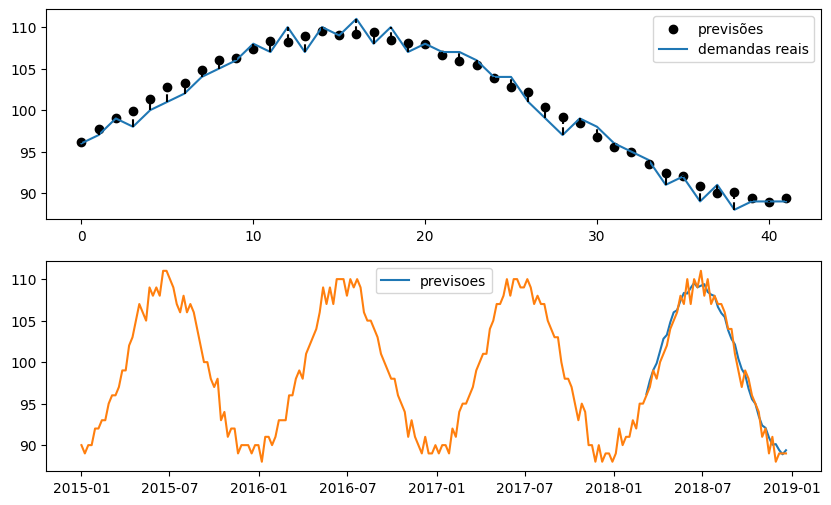

In [27]:
fig=plt.figure(figsize=(10,6))

ax=fig.add_subplot(2,1,1)

plt.scatter(range(len(df_test)),previsao_test,label='previsões',color='black')
plt.plot(range(len(df_test)),df_test,label='demandas reais')
plt.legend()

indice = 0 
for i in range(len(previsao_test)):
    if previsao_test[i] > df_test.iloc[i]:
        plt.vlines(x=i, ymin=df_test.iloc[i], ymax=previsao_test[i],linestyle='--',color='black')
    else:
        plt.vlines(x=i, ymin=previsao_test[i], ymax=df_test.iloc[i],linestyle='--',color='black')
    indice+=1

ax=fig.add_subplot(2,1,2)
plt.plot(previsao_test,label='previsoes')
plt.plot(df_demandas)
plt.legend()

In [28]:
import numpy as np

In [29]:
residuos = np.array(df_test)-np.array(previsao_test)

$e_{i} = y_{i}-\hat{y}_{i}\sim N\left(0,30\right)$

In [30]:
import seaborn as sns

In [31]:
normal = np.random.normal(0, 1,2000000)

$\mathbf{IMPORTANTE}$

Em modelos de séries temporais, não existem nenhuma suposição em relação aos resíduos, contudo, sabemos como o nosso resíduo e nossos dados se comportam, suas distribuições e etc, portanto usaremos isso a nosso favor para se construir um bom modelo. Por isso a análise de resíduo a seguir

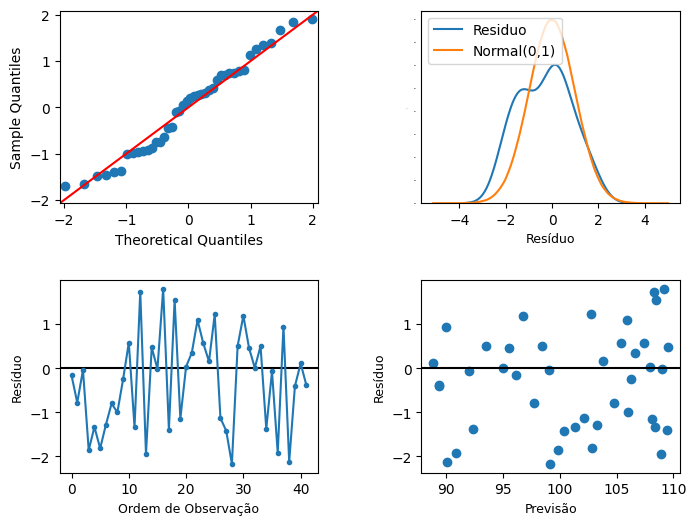

In [32]:
fig=plt.figure(figsize=(8,6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax=fig.add_subplot(2,2,3)
plt. axhline(y=0,xmin=0,xmax=len(previsao_test),color='black')
plt.plot(range(len(residuos)),residuos,marker='.')
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Ordem de Observação',fontsize=9)

ax=fig.add_subplot(2,2,2)
sns.kdeplot(residuos,label="Residuo")
sns.kdeplot(normal,label='Normal(0,1)')
plt.legend()
plt.tick_params(axis='y', labelsize=0, length=0)
plt.ylabel([], fontsize=0)
plt.xlabel('Resíduo',fontsize=9)

ax=fig.add_subplot(2,2,1)
sm.qqplot(residuos,fit=True,line='45',ax=ax)

ax=fig.add_subplot(2,2,4)
plt.scatter(previsao_test,residuos)
plt.axhline(y=0,xmin=0,xmax=len(previsao_test),color='black')
plt.ylabel('Resíduo',fontsize=9)
plt.xlabel('Previsão',fontsize=9)


plt.show()

In [33]:
import statsmodels.api as sm

#print('MSE_Teste =',sm.tools.eval_measures.mse(previsoes_test, df_test.y, axis=0))

print('RMSE_Teste =',sm.tools.eval_measures.rmse(previsao_test, df_test, axis=0))

print('MAE_Teste =',sm.tools.eval_measures.meanabs(previsao_test, df_test, axis=0))

RMSE_Teste = 1.1456285960270258
MAE_Teste = 0.9389264510886193


MAE = $\frac{1}{n}\sum_{i=1}^{n}\mid y_{i}-\hat{y}\mid$ 

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}\right)^{2}}$

# Fase de Previsão

In [34]:
qtd_previsoes = 52

In [36]:
for i in range(30):
        
    model = sm.tsa.arima.ARIMA(df_demandas,**params)
    results = model.fit()
    previsao = results.predict(start=len(df_demandas),end=len(df_demandas)+qtd_previsoes-1,dynamic=True)
    with open(f"C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Previsoes/Prev_ari/Previsao_ari{i}.txt", "w") as arquivo:
        n = len(previsao)
        for j in range(n-1):
            arquivo.write(f'{previsao[j]}, ')
        arquivo.write(f'{previsao[n-1]}')

C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
C:\Users\marcio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\marcio\AppData\